# Practical 9: Neural Network implementation on Amazon Review dataset
---
**ID:** 17CE023<br>
**Author:** Bhishm Daslaniya<br>

---

**Dataset Link**: https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products

**GloVe Wordembedding Link**: https://www.kaggle.com/watts2/glove6b50dtxt


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
data = pd.read_csv("../input/consumer-reviews-of-amazon-products/1429_1.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
data.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [48]:
data = data[['reviews.rating' , 'reviews.text']]
data=data.dropna()
data.head()

,reviews.rating,reviews.text
0,5.0,This product so far has not disappointed. My c...
1,5.0,great for beginner or experienced person. Boug...
2,5.0,Inexpensive tablet for him to use and learn on...
3,4.0,I've had my Fire HD 8 two weeks now and I love...
4,5.0,I bought this for my grand daughter when she c...


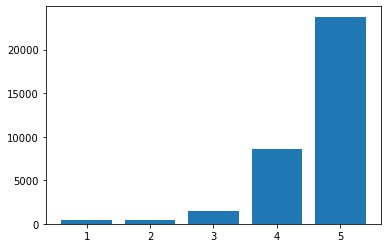

In [49]:
counts = data['reviews.rating'].value_counts()
plt.bar(counts.index, counts.values)
plt.show()

Due to the imbalance of our dataset, we try to add in more datas to reduce overfitting.

We add files such that we include rows with reviews lesser than 4 inorder to balance the dataset.

In [50]:
data2 = pd.read_csv("../input/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
data2 = data2[['reviews.rating' , 'reviews.text']]
data2 = data2[data2["reviews.rating"]<=3]

data3 = pd.read_csv("../input/consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")
data3 = data3[['reviews.rating' , 'reviews.text']]
data3 = data3[data3["reviews.rating"]<=3]

frames = [data, data2, data3]
df = pd.concat(frames)
df = df.dropna()

## We have 3 classifications.<br>
1. Negative (0) for star rating 1 and 2.<br>
2. Average (1) for star rating 3.<br>
3. Positive (2) for star rating 4 and 5.

In [51]:
sentiment = {1: 0,
            2: 0,
            3: 1,
            4: 2,
            5: 2}

df["sentiment"] = df["reviews.rating"].map(sentiment)

#print(df[df["sentiment"].isnull()])
df["sentiment"] = pd.to_numeric(df["sentiment"], errors='coerce')                                    
df = df.dropna(subset=["sentiment"])
df["sentiment"]  = df["sentiment"] .astype(int)

## Preprocessing the data
Applying various NLP techniques - tokenize and remove all the puncuations and uneseccary jargons.

In [52]:
df["reviews.text"]=df["reviews.text"].apply(lambda elem: re.sub("[^a-zA-Z]", " ", str(elem)))
df["reviews.text"]=df["reviews.text"].str.lower()
#tokenizer = RegexpTokenizer(r'\w+')
words_descriptions = df["reviews.text"].str.split()

stopword_list = stopwords.words('english')
ps = PorterStemmer()
words_descriptions = words_descriptions.apply(lambda elem: [word for word in elem if not word in stopword_list])
words_descriptions = words_descriptions.apply(lambda elem: [ps.stem(word) for word in elem])

df['cleaned'] = words_descriptions.apply(lambda elem: ' '.join(elem))
df['cleaned'].head()

0    product far disappoint children love use like ...
1       great beginn experienc person bought gift love
2    inexpens tablet use learn step nabi thrill lea...
3    fire hd two week love tablet great valu prime ...
4    bought grand daughter come visit set user ente...
Name: cleaned, dtype: object

Vectorizing the array.

In [53]:
vectorizer =TfidfVectorizer()
text = vectorizer.fit_transform(df['cleaned']).toarray()
texts=pd.DataFrame(text)

Splitting the data into training and testing set.

In [54]:
y=df["sentiment"].values
X=pd.DataFrame(texts)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

## Using GloVe
GloVe, coined from Global Vectors, is a model for distributed word representation. The model is an unsupervised learning algorithm for obtaining vector representations for words. This is achieved by mapping words into a meaningful space where the distance between words is related to semantic similarity

In [55]:
f = open('../input/glove6b50dtxt/glove.6B.50d.txt',encoding="utf8")
embidx = {}
for line in f:
    val = line.split()
    word = val[0]
    coeff = np.asarray(val[1:],dtype = 'float')
    embidx[word] = coeff

f.close()

print('Found %s word vectors.' % len(embidx))

Found 400000 word vectors.


In [56]:
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Embedding, GRU, Dropout, LSTM, Bidirectional
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import GlobalMaxPooling1D

Tokenizer is done to vectorize a text corpus, by turning each text into either a sequence of integers or into a vector. And then we split it to train and test sets.

In [57]:
token = Tokenizer()
token.fit_on_texts(df["reviews.text"])
word_index = token.word_index
max_len = 120
X_train, X_test, y_train, y_test = train_test_split(df["reviews.text"], df["sentiment"], test_size=0.25, random_state=42)


1.Converting Text to Sequence

2.Padding to ensure that all sequences in a list have the same length.

In [58]:
X_train = token.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=max_len, padding = "post",truncating = "post")

X_test = token.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=max_len, padding = "post", truncating = "post")

y_train = np_utils.to_categorical(y_train, num_classes=3)
y_test = np_utils.to_categorical(y_test, num_classes=3)

len(y_test),len(X_test),len(X_train),len(y_train)

(9432, 9432, 28295, 28295)

In [59]:
vocab_size=len(word_index)
embedding_dim = 50

embeddings_matrix = np.zeros((vocab_size+1, embedding_dim));

for word, i in word_index.items():
    embedding_vector = embidx.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

print(len(embeddings_matrix))

14106


In [60]:
embeddings_matrix.shape

(14106, 50)

In [61]:
embedd_layer = Embedding(vocab_size+1, embedding_dim, input_length=max_len, weights=[embeddings_matrix], trainable=False)

model = Sequential()
model.add(embedd_layer)
model.add(Bidirectional(LSTM(64 , return_sequences = True , dropout = 0.1 , recurrent_dropout = 0.1)))
model.add(GlobalMaxPooling1D())
model.add(Dense(150,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation="softmax"))
model.compile(loss = 'binary_crossentropy' , optimizer = Adam(lr = 0.01) , metrics = ['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 120, 50)           705300    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 120, 128)          58880     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 150)               19350     
_________________________________________________________________
dropout_3 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 453       
Total params: 783,983
Trainable params: 78,683
Non-trainable params: 705,300
___________________________________________

In [62]:
hist = model.fit(X_train,y_train,epochs = 10 , batch_size = 512, validation_data = (X_test,y_test))

Epoch 1/10
56/56 [==============================] - 47s 833ms/step - loss: 0.2722 - accuracy: 0.8560 - val_loss: 0.2218 - val_accuracy: 0.8766
Epoch 2/10
56/56 [==============================] - 45s 811ms/step - loss: 0.2087 - accuracy: 0.8816 - val_loss: 0.1992 - val_accuracy: 0.8839
Epoch 3/10
56/56 [==============================] - 46s 822ms/step - loss: 0.1901 - accuracy: 0.8888 - val_loss: 0.1883 - val_accuracy: 0.8891
Epoch 4/10
56/56 [==============================] - 47s 848ms/step - loss: 0.1738 - accuracy: 0.8978 - val_loss: 0.1780 - val_accuracy: 0.8892
Epoch 5/10
56/56 [==============================] - 46s 820ms/step - loss: 0.1638 - accuracy: 0.9036 - val_loss: 0.1734 - val_accuracy: 0.8984
Epoch 6/10
56/56 [==============================] - 45s 812ms/step - loss: 0.1550 - accuracy: 0.9088 - val_loss: 0.1679 - val_accuracy: 0.8981
Epoch 7/10
56/56 [==============================] - 45s 805ms/step - loss: 0.1458 - accuracy: 0.9143 - val_loss: 0.1645 - val_accuracy: 0.9034

In [63]:
result = model.evaluate(X_test,y_test)
print('Test accuracy :', result[1]*100)

295/295 [==============================] - 7s 23ms/step - loss: 0.1662 - accuracy: 0.9075
Test accuracy : 90.75487852096558


The accuracy is not high enough is because of the data imbalance.

---